<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_06_%EC%82%B0%EC%A0%90%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.06. 산점도

---
* 날짜: 2022-04-19
* 이름: 고민수
```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (15,8)})
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rc("font", family="Noto Sans KR") # 한글 폰트 설정
plt.rc("axes", unicode_minus=False) # 음수값 깨지는 폰트 설정


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### | 기본사용

```
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()
```

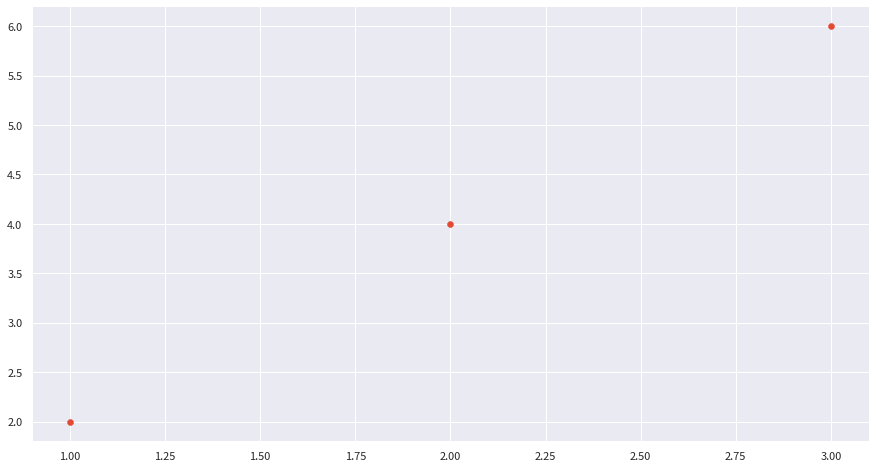

In [3]:
x = [1,2,3]
y = [2,4,6]
plt.scatter(x, y)
plt.show()

#### | 옵션

```
plt.scatter(x, y, 
            s=None, # 마커 크기 - x, y 길이와 동일
            c=None, # 색깔 - x, y의 길이와 동일 
            marker=None # 마커 종류
            cmap=None, # 컬러맵
            norm=None, # 정규화 여부
            alpha=None, # 투명도
            linewidths=None, # 테두리 두께
            edgecolors=None) # 테두리 색깔 - 기본 'face'
```

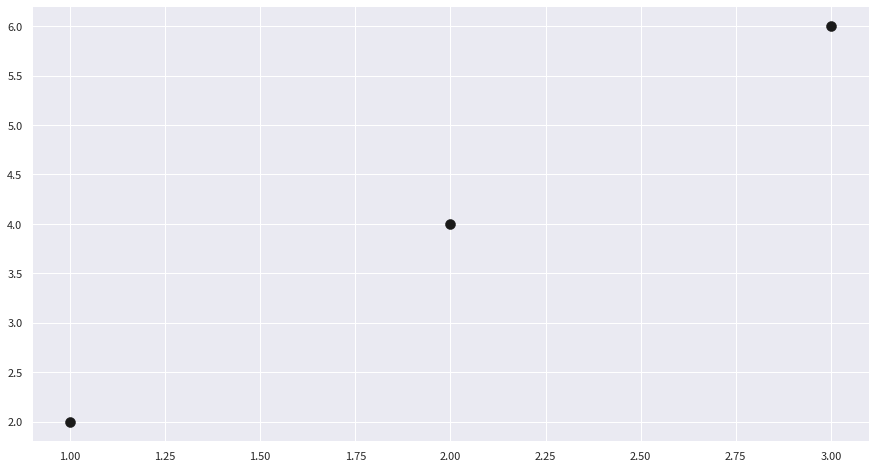

In [19]:
plt.scatter(x,y,
           s=100,
           c="k",
           cmap="Blues")

### (2) Seaborn 으로 그리기
---



#### | 기본사용

```
sns.scatterplot(x=x,y=y)
```

<AxesSubplot:>

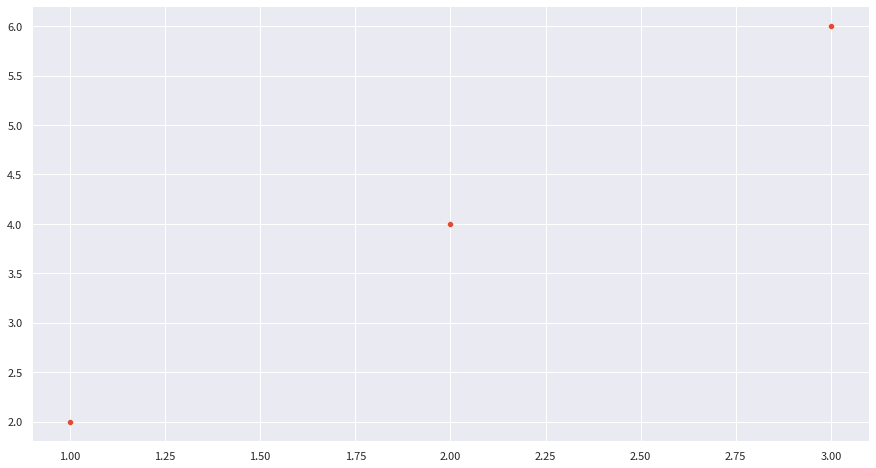

In [20]:
sns.scatterplot(x=x,y=y)

#### | 옵션

```
seaborn.scatterplot(x=None, y=None, 
                    style=None, # 마커 스타일 리스트
                    palette=None, # 컬러맵
                    alpha=None, # 투명도 
                    legend='auto' # 각주위치 {auto, brief, full, False}) 
                    
```

#### | DataFrame 사용
---



* 데이터 프레임을 만들어 줍니다.



In [26]:
df = pd.DataFrame([x,y], ["x","y"])
df = df.T
df

,x,y
0,1,2
1,2,4
2,3,6


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.scatter(x=x, y=y)
```




<AxesSubplot:xlabel='x', ylabel='y'>

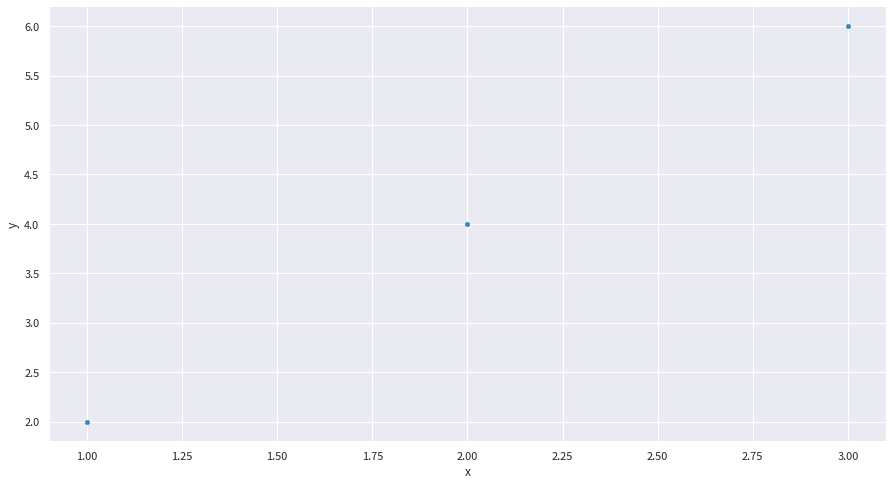

In [28]:
df.plot.scatter(x="x", y='y')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.scatterplot(data=df, x=x, y=y)
```



##  **실습** 
---



### (1) 데이터에 따른 크기 및 색깔 지정

```
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)
```

In [29]:
n = 50
np.random.seed(42)
x = np.random.rand(n)
y = np.random.rand(n)

### (2) 산점도를 이용한 아이리스 데이터 시각화



```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [68]:
from sklearn.datasets import load_iris

# 데이터 가져오기
iris = load_iris()

x_names = iris.feature_names
y_names = iris.target_names
print("x names : ", x_names)
print("y names: ", y_names)

x_data = iris.data
y_data = iris.target
print("x_data" , x_data.shape)
print("y_data" , y_data.shape)

# 데이터 프레임 제작
df_1 = pd.DataFrame(x_data)
df_2 = pd.DataFrame(y_data)
df = pd.concat([df_1, df_2], axis=1)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width',"label"]
df["label"] = df["label"].astype(str)

x names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y names:  ['setosa' 'versicolor' 'virginica']
x_data (150, 4)
y_data (150,)


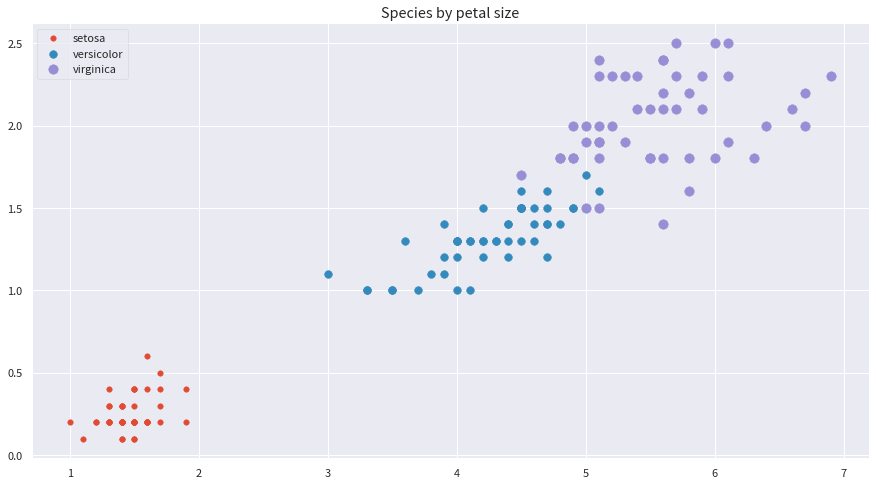

In [105]:
for i in df["label"].unique():
    temp = df[df["label"]==i]
    plt.scatter(temp["petal length"].values, temp["petal width"].values,
                s=((int(i)+1)*30),
                label=y_names[int(i)])

plt.title("Species by petal size")

plt.legend()
plt.show()


##  **과제** 
---


### (1) 산점도를 이용한 캘리포니아 집값 시각화

* 아래와 같은 산점도를 그리세요.
  * `/content/sample_data/california_housing_test.csv`을 불러오세요.
  * `x`축은 `latitude` 입니다.
  * `y`축은 `longitude` 입니다.
  * 점의 크기는 `population`에 비례합니다.
  * `median_house_value`로 색깔을 나타내고 `colorbar`를 추가합니다.
* 색과 마커, 비례 정도 등 세세한 부분은 각자의 스타일로 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0205-01.png?raw=true)

In [117]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

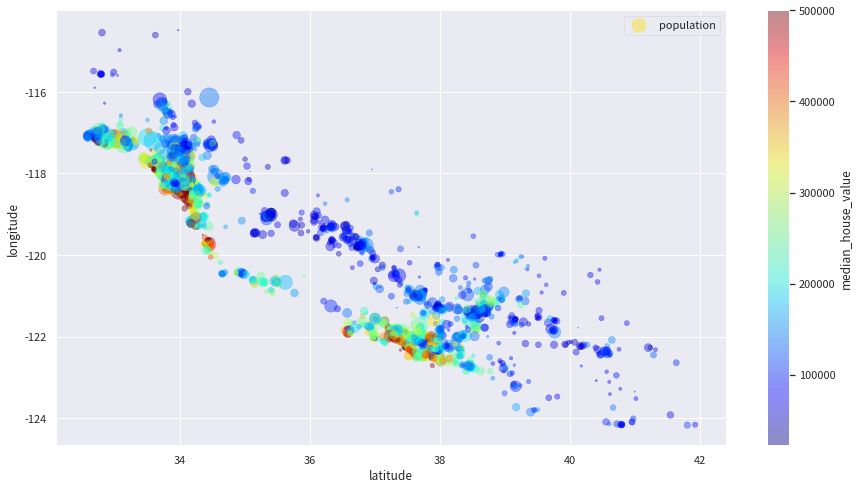

In [119]:
df = pd.read_csv("sample_data/california_housing_test.csv")


df.plot(kind="scatter", x="latitude", y="longitude",alpha=0.4,
            s=housing["population"]/30, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)